#### Hafiyyan Kisaragi P - 20/460996/PA/20040

In [534]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [535]:
df= pd.read_csv('iris.csv')

In [536]:
x=df[['sepal.length','sepal.width']]
y=df.variety
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [537]:
#change value to numpy
x_train=x_train.values
y_train=y_train.values
x_test=x_test.values
y_test=y_test.values
x=x.values
y=y.values

In [538]:
x_train=x_train.transpose()
y_train=y_train.reshape(1,x_train.shape[1])

x_test=x_test.transpose()
y_test=y_test.reshape(1,x_test.shape[1])

x=x.transpose()
y=y.reshape(1,x.shape[1])

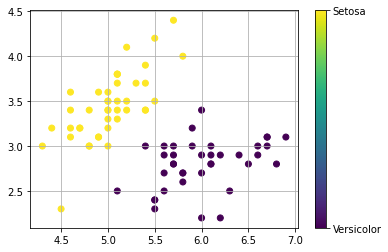

In [539]:
#convert the ouput to boolean
for i in range(len(y_train[0])): 
    if(y_train[0][i]=="Versicolor"):
        y_train[0][i]=0
    if(y_train[0][i]=="Setosa"):
        y_train[0][i]=1
for i in range(len(y_test[0])):
    if(y_test[0][i]=="Versicolor"):
        y_test[0][i]=0
    if(y_test[0][i]=="Setosa"):
        y_test[0][i]=1
for i in range(len(y[0])):
    if(y[0][i]=="Versicolor"):
        y[0][i]=0
    if(y[0][i]=="Setosa"):
        y[0][i]=1

target=['Versicolor','Setosa']
formats=plt.FuncFormatter(lambda i,*args: target[int(i)])
plt.scatter(x_train[0],x_train[1],c=y_train)
plt.colorbar(ticks=[0,1],format=formats)
plt.grid()
plt.show()

#### Sigmoid function

In [540]:
def sigmoid(z):
    z=z.astype(np.float64)
    return 1/(1+np.exp(-z))

#### Cost function

In [541]:
def costFunction(x,y,z):
    sig=sigmoid(z)
    cost=-(1/x*np.sum(y*np.log(sig)+(1-y)*np.log(1-sig)))
    return cost

#### Gradient Descent with training data

In [542]:
dataResult=[]
def trainingData(o,p,learning_rate,iteraion):
    a=x_train.shape[1]
    b=x_train.shape[0]
    tW=np.zeros((b,1))
    tB=0
   
    print("Training Data")
    for i in range(iteraion):
        z=np.dot(tW.transpose(),o)+tB
        z=z.astype(np.float64)
        sig=sigmoid(z)

        cost=costFunction(a,p,z)
        #Gradient Descent
        dW=(1/a)*np.dot(sig-p,o.transpose())
        dB=(1/a)*np.sum(sig-p)

        tW=tW-learning_rate*dW.transpose()
        tB=tB-learning_rate*dB
        dataResult.append(cost)

        if(i%(iteraion/5)==0):
            print("cost fuction",i,":",cost)
    return tW,tB
tW,tB=trainingData(x_train,y_train,learning_rate=0.001,iteraion=100)

    

Training Data
cost fuction 0 : 0.6931471805599456
cost fuction 20 : 0.6917454595437013
cost fuction 40 : 0.6903523520068973
cost fuction 60 : 0.6889665131221002
cost fuction 80 : 0.687587049227109


#### Theta

In [543]:
print("Theta 0:",tW)
print("Theta 1:",tB)


Theta 0: [[-0.011795748321104874]
 [0.023421490553427758]]
Theta 1: 0.0023398244140851385


#### Boundary

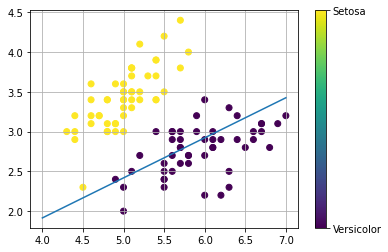

In [544]:
xl=np.linspace(4,7,100)
yl=xl*(-tW[0]/tW[1])+(-tB/tW[1])
target=['Versicolor','Setosa']
formats=plt.FuncFormatter(lambda i,*args: target[int(i)])\


plt.scatter(x[0],x[1],c=y)
plt.colorbar(ticks=[0,1],format=formats)
plt.grid()
plt.plot(xl,yl)
plt.show()

#### Accuracy

In [545]:
def accuracy(x,y,w,b):
    z=np.dot(w.transpose(),x)+b
    z=z.astype(np.float64)
    y=y.astype(np.float64)
    sig=sigmoid(z)
    sig=sig>0.5
    sig=np.array(sig,dtype='float64')
    acc=(1-np.sum(np.absolute(sig-y))/y.shape[1])*100
    print("accuracy:",acc,"%")
accuracy(x_test,y_test,tW,tB)

accuracy: 75.0 %


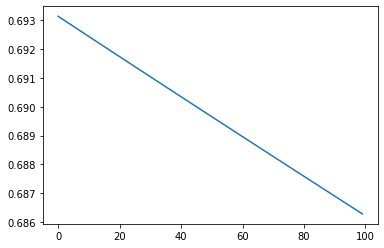

In [546]:
plt.plot(np.arange(100),dataResult)
plt.show()